In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pi = np.pi

def effective_wind_speed(wind_speeds):
    v = np.copy(wind_speeds)
    v[v < 4.]   = 0.
    v[v > 25.]  = 0.
    v[v > 12.5] = 12.5
    return v

def power_curve(wind_speeds):
    R = 287.
    T = 10. + 273.15
    c = 0.19
    p = 1000.
    A = 1.
    P = (c*p*A*(wind_speeds**3)) / (2.*R*T)
    
    ### scale to 100%
    P = P * (100./np.max(P))
    return P


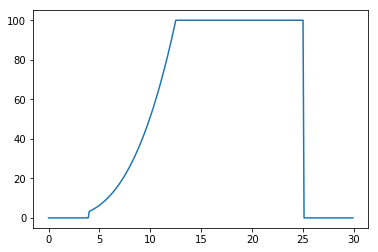

In [3]:
bin_width = 0.1
wind_10m  = np.arange(0,100,bin_width)
    
P  = power_curve(effective_wind_speed(wind_10m))

ind1 = wind_10m < 30. # to limit xaxis on plots
plt.plot(wind_10m[ind1], P[ind1])

In [4]:
def rayleigh_dist_power_curve(wind_10m, P, height=10):
    
    if height == 10: adj = 1.
    if height == 60: adj = 1.29
    
    Rd = np.zeros(wind_10m.shape)
    
    for j in range(0, len(wind_10m)):

        mu = wind_10m[j] * adj
        si = mu / np.sqrt(pi/2.)
        x  = wind_10m

        if mu == 0:
            F = 0.
            F_norm = 0.
        else:
            F = (x/si) * np.exp( (-x**2.) / (2.*si**2) )
            F_norm = F / np.sum(F)

        Rd[j] = np.sum(F_norm*P)
        
    return Rd


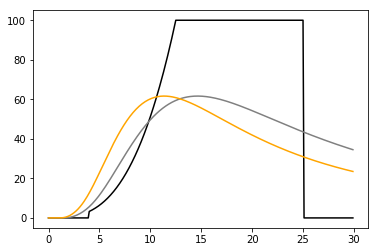

In [5]:
# My attempt at reproducing Figure 2 in Macleod et al., 2017

plt.plot(wind_10m[ind1], P[ind1], color='k')

Rd10 = rayleigh_dist_power_curve(wind_10m, P, height=10)
plt.plot(wind_10m[ind1], Rd10[ind1], color='Grey')

Rd60 = rayleigh_dist_power_curve(wind_10m, P, height=60)
plt.plot(wind_10m[ind1], Rd60[ind1], color='orange')

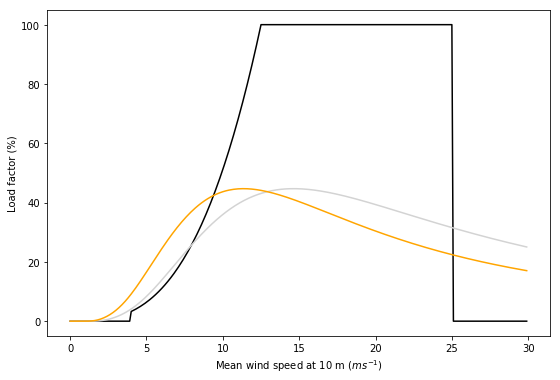

In [16]:
# now accounting for power losses arising from the transmission and distribution of electricity

fig = plt.figure(figsize=(9,6))

plt.plot(wind_10m[ind1], P[ind1], color='k')

Rd10 = rayleigh_dist_power_curve(wind_10m, P, height=10)
plt.plot(wind_10m[ind1], Rd10[ind1]*0.725, color='LightGrey')   # <-- these seem to be too low ??

Rd60 = rayleigh_dist_power_curve(wind_10m, P, height=60)
plt.plot(wind_10m[ind1], Rd60[ind1]*0.725, color='orange') # <-- these seem to be too low ??

plt.xlabel('Mean wind speed at 10 m ($ms^{-1}$)')
plt.ylabel('Load factor (%)')